In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

import datetime as dt
import mplfinance as mpf
import time
import yfinance as yf

import os
from os import listdir
from os.path import isfile, join

In [2]:
import statsmodels.api as sm
import seaborn as sns

In [18]:
#default Values
path ="/workspaces/Quantitative-Finance/Data/"
S_year = 2018
S_month = 1
S_day = 1
S_date_str = f"{S_year}-{S_month}-{S_day}"
S_date_datetime = dt.datetime(S_year,S_month,S_day)

E_year = 2021
E_month = 12
E_day = 31
E_date_str = f"{E_year}-{E_month}-{E_day}"
E_date_datetime = dt.datetime(E_year,E_month,E_day)


In [19]:
# return dataframe from csv
def get_df_from_csv(ticker):
    try:
        df = pd.read_csv(path+ticker+".csv",index_col='Date',parse_dates=True)
    except FileNotFoundError:
        print("File doesn't exist")
    else:
        return df

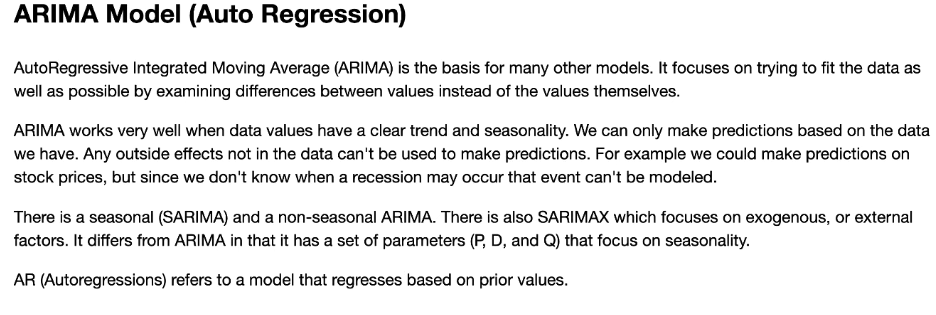

In [20]:
# # Regression Analysis
# # Arima Model
# from statsmodels.tsa.ar_model import AutoReg, ar_select_order
# a_df = get_df_from_csv("GOOG")
# a_df = a_df.asfreq('d') 
# a_df = a_df.fillna(method='ffill')
# a_df.drop(a_df.columns[a_df.columns.str.contains('unnamed', case=False)],
#           axis=1, inplace=True)
# a_df = a_df.drop(['daily_return'], axis=1)


# sns.set_style('darkgrid')
# pd.plotting.register_matplotlib_converters()
# sns.mpl.rc('figure',figsize=(19,13))
# fig,ax = plt.subplots()
# lags = ar_select_order(a_df, maxlag=30)
# model = AutoReg(a_df['Adj Close'], lags.ar_lags)
# model_fit = model.fit()

# # len(a_df) 
# # 1690
# # 80% = 1352

# train_df = a_df.iloc[50:1352]
# test_df = a_df.iloc[1352:]

# train_model = AutoReg(a_df['Adj Close'],800).fit(cov_type="HC0")
# start = len(train_df)
# end = len(train_df) + len(test_df) - 1

# prediction = train_model.predict(start=start,end=end, dynamic=True)

# ax = test_df.plot(ax=ax)
# ax = prediction.plot(ax=ax)

# forecast = train_model.predict(start=end, end=end+160, dynamic=True)
# ax = forecast.plot(ax=ax)



/tmp/ipykernel_1955/3170321216.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  a_df = a_df.fillna(method='ffill')


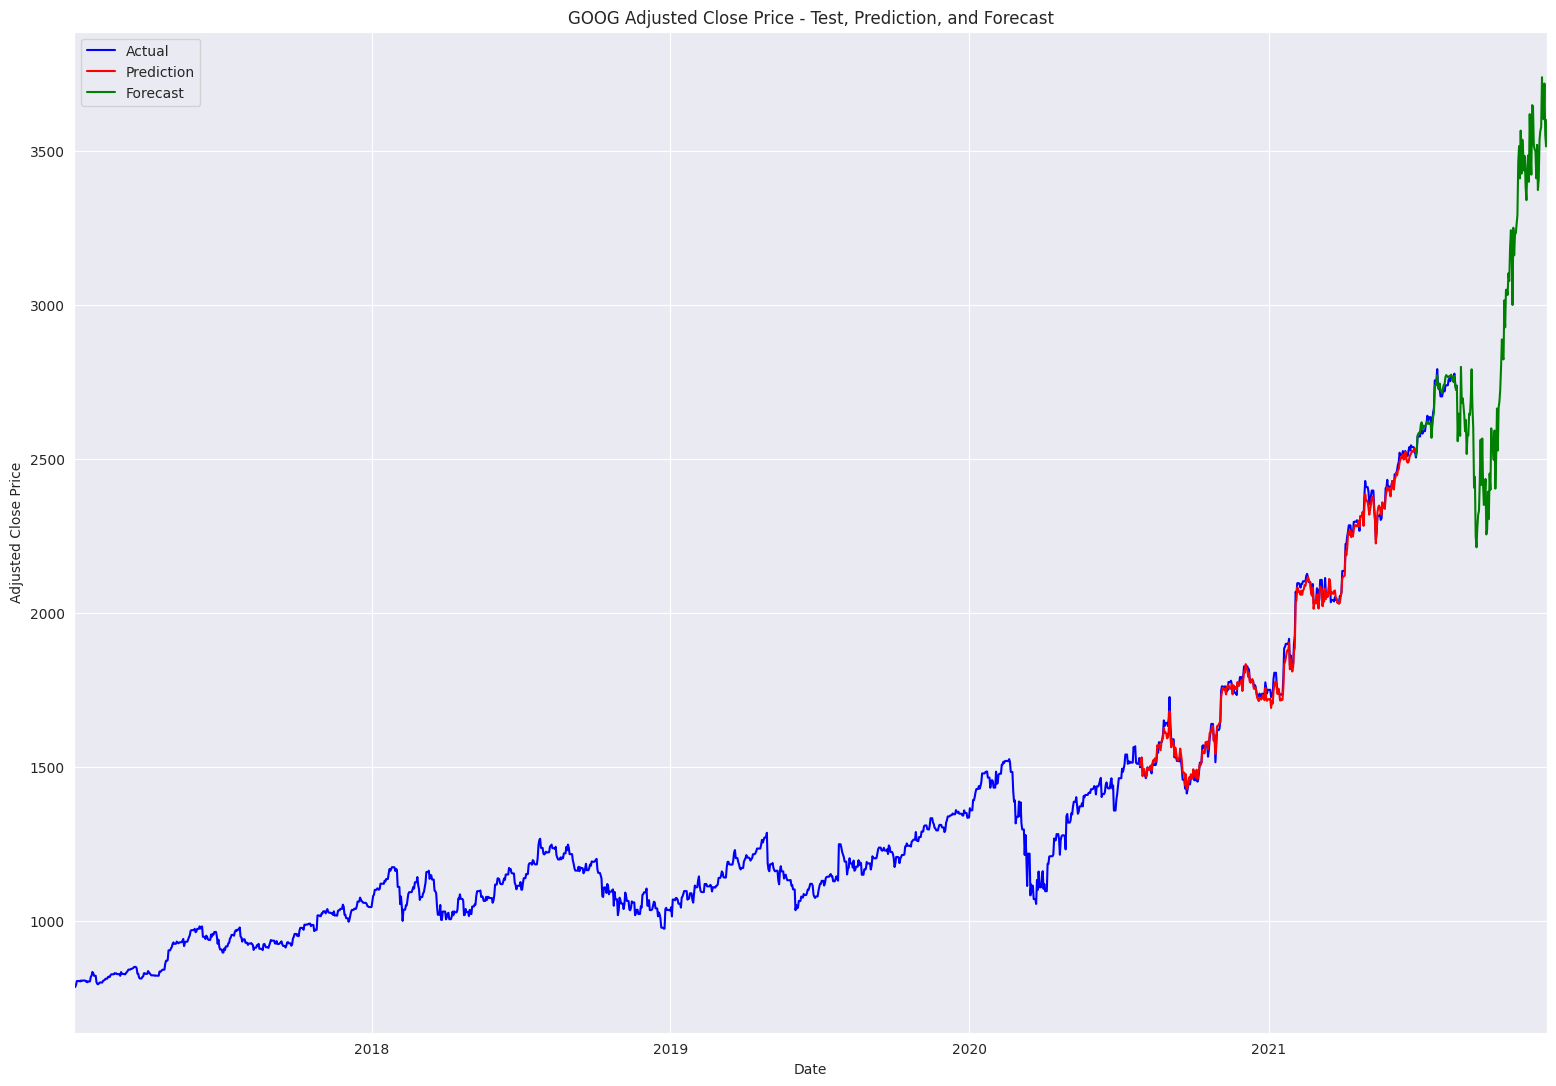

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

# Load and preprocess data
a_df = get_df_from_csv("GOOG")
a_df = a_df.asfreq('d') 
a_df = a_df.fillna(method='ffill')
a_df.drop(a_df.columns[a_df.columns.str.contains('unnamed', case=False)], axis=1, inplace=True)
a_df = a_df.drop(['daily_return'], axis=1)

# Set up plot style
sns.set_style('darkgrid')
pd.plotting.register_matplotlib_converters()
sns.mpl.rc('figure', figsize=(19, 13))

# Determine optimal lags and fit model
lags = ar_select_order(a_df, maxlag=30)
model = AutoReg(a_df['Adj Close'], lags.ar_lags)
model_fit = model.fit()

# Split data into training and testing sets
train_df = a_df.iloc[50:1352]
test_df = a_df.iloc[1352:]

# Fit the model on the training data
train_model = AutoReg(a_df['Adj Close'], 800).fit(cov_type="HC0")
start = len(train_df)
end = len(train_df) + len(test_df) - 1

# Make predictions
prediction = train_model.predict(start=start, end=end, dynamic=True)

# Plot test data and predictions
fig, ax = plt.subplots()
ax = a_df['Adj Close'].plot(ax=ax, color='blue', label='Actual')
ax = prediction.plot(ax=ax, color='red', label='Prediction')

# a_df['Adj Close'].plot(ax=ax, color='black', label='Raw Data')

# Forecast future values
forecast = train_model.predict(start=end, end=end+160, dynamic=True)
ax = forecast.plot(ax=ax, color='green', label='Forecast')

# Customize the plot
plt.legend()
plt.title('GOOG Adjusted Close Price - Test, Prediction, and Forecast')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.show()
